<a href="https://colab.research.google.com/github/Jannath19/datasci_5_statistics/blob/main/HHA_507_Datasci_5_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading In Packages:

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency as chi2, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

# Chi Square Test

In [3]:
df1 = pd.read_csv('Student Mental health.csv')
df1.sample(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
62,8/7/2020 17:05,Female,18.0,CTS,Year 1,3.50 - 4.00,No,No,No,Yes,No
29,8/7/2020 14:05,Female,24.0,BCS,year 4,3.50 - 4.00,No,No,No,No,No
58,8/7/2020 16:22,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,No,No,No
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No
17,8/7/2020 12:52,Female,24.0,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,Yes,No
48,8/7/2020 15:14,Male,24.0,BCS,year 2,3.00 - 3.49,No,Yes,No,No,No
46,8/7/2020 15:12,Female,19.0,Engineering,year 1,3.50 - 4.00,No,No,Yes,No,No
78,13/07/2020 10:07:32,Female,19.0,Biotechnology,Year 3,0 - 1.99,No,No,No,No,No
89,13/07/2020 11:54:58,Male,24.0,Engineering,Year 2,2.00 - 2.49,No,No,No,Yes,No
20,8/7/2020 13:12,Female,19.0,Engineering,year 1,3.00 - 3.49,No,No,No,Yes,No


## Null Hypothesis (H0):** There is no significant association between the choice of course and the presence of depression, anxiety, and panic attacks.

## Alternative Hypothesis (H1): There is a significant association between the choice of course and the presence of depression, anxiety, and panic attacks.



In [12]:
import pandas as pd
from scipy.stats import chi2_contingency  # Import chi2_contingency from scipy.stats

# Replace "..." with your actual DataFrame
df1 = pd.DataFrame({
    'Choose your gender': ['Female', 'Male', 'Female', 'Female', 'Male'],
    'Do you have Depression?': ['No', 'No', 'Yes', 'No', 'Yes']
})

# Count unique values in each column
df1_gender_counts = df1['Choose your gender'].value_counts()
df1_depression_counts = df1['Do you have Depression?'].value_counts()

# Create a contingency table
contingency_table = pd.crosstab(df1['Choose your gender'], df1['Do you have Depression?'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")


Do you have Depression?  No  Yes
Choose your gender              
Female                    2    1
Male                      1    1
Chi2 value: 0.0
P-value: 1.0


## **Analysis**
## In the analysis of the association between gender and the presence of depression, the chi-squared test indicated no significant relationship (χ² = 0.0, p = 1.0). This suggests that there is no significant difference in the prevalence of depression between genders within the sample.

## T Test

In [14]:
df2 = pd.read_csv('Maternal Health Risk Data Set.csv')
df2.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
204,15,76,49,7.5,98.0,77,low risk
521,23,120,90,7.5,98.0,70,low risk
523,17,85,60,7.5,102.0,86,low risk
772,60,120,85,15.0,98.0,60,mid risk
471,42,140,100,18.0,98.0,90,high risk
524,32,120,90,7.5,98.0,70,low risk
589,20,100,90,7.5,98.0,88,mid risk
96,29,130,70,7.8,98.0,78,mid risk
759,35,120,80,6.9,98.0,78,mid risk
389,29,130,70,7.8,98.0,78,mid risk


#**Hypothesis**
# Null Hypothesis (H0): The mean Systolic Blood Pressure (SystolicBP) is not significantly different between the 'low risk' and 'high risk' groups.

# Alternative Hypothesis (H1): The mean Systolic Blood Pressure (SystolicBP) is significantly different between the 'low risk' and 'high risk' groups.



In [17]:
# Filter rows where 'Age' is between 18 and 65, 'SystolicBP' is between 100 and 140, 'DiastolicBP' is between 70 and 90,
# 'BS' is less than 10, 'BodyTemp' is 98.0, and 'HeartRate' is between 70 and 90.
filtered_df2 = df2[(df2['Age'] >= 18) & (df2['Age'] <= 65) &
                 (df2['SystolicBP'] >= 100) & (df2['SystolicBP'] <= 140) &
                 (df2['DiastolicBP'] >= 70) & (df2['DiastolicBP'] <= 90) &
                 (df2['BS'] < 10) &
                 (df2['BodyTemp'] == 98.0) &
                 (df2['HeartRate'] >= 70) & (df2['HeartRate'] <= 90)]

# Sample 5 random rows from the filtered DataFrame
sampled_df2 = filtered_df2.sample(5)

# Display the sampled data
print(sampled_df2)


     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate  RiskLevel
953   42         120           80  7.5      98.0         70   low risk
497   19         120           80  7.0      98.0         70   low risk
615   34         110           70  7.0      98.0         80  high risk
884   32         120           90  6.8      98.0         70   low risk
699   34         120           75  8.0      98.0         70   low risk


In [23]:
# Filter rows where 'Age' is between 30 and 40, 'SystolicBP' is between 110 and 120, 'DiastolicBP' is between 70 and 90,
# 'BS' is less than 7.5, 'BodyTemp' is 98.0, 'HeartRate' is between 70 and 80, and 'RiskLevel' is 'high risk'.
filtered_df2 = df2[(df2['Age'] >= 30) & (df2['Age'] <= 40) &
                   (df2['SystolicBP'] >= 110) & (df2['SystolicBP'] <= 120) &
                   (df2['DiastolicBP'] >= 70) & (df2['DiastolicBP'] <= 90) &
                   (df2['BS'] < 7.5) &
                   (df2['BodyTemp'] == 98.0) &
                   (df2['HeartRate'] >= 70) & (df2['HeartRate'] <= 80) &
                   (df2['RiskLevel'] == 'high risk')]

# Check the number of rows that meet the filtering criteria
num_matching_rows = len(filtered_df2)

# Sample either 5 rows or the available number of matching rows, whichever is smaller
sample_size = min(5, num_matching_rows)

# Sample the rows from the filtered DataFrame
sampled_df2 = filtered_df2.sample(sample_size)

# Display the sampled data
print(sampled_df2)



     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate  RiskLevel
615   34         110           70  7.0      98.0         80  high risk
356   35         120           80  6.9      98.0         80  high risk
353   40         120           90  6.9      98.0         80  high risk


In [20]:
# Filter rows where 'Age' is between 30 and 40, 'SystolicBP' is between 110 and 120, 'DiastolicBP' is between 70 and 90,
# 'BS' is less than 7.5, 'BodyTemp' is 98.0, 'HeartRate' is between 70 and 80, and 'RiskLevel' is 'low risk'.
filtered_df2 = df2[(df2['Age'] >= 30) & (df2['Age'] <= 40) &
                   (df2['SystolicBP'] >= 110) & (df2['SystolicBP'] <= 120) &
                   (df2['DiastolicBP'] >= 70) & (df2['DiastolicBP'] <= 90) &
                   (df2['BS'] < 7.5) &
                   (df2['BodyTemp'] == 98.0) &
                   (df2['HeartRate'] >= 70) & (df2['HeartRate'] <= 80) &
                   (df2['RiskLevel'] == 'low risk')]

# Sample 5 random rows from the filtered DataFrame
sampled_df2 = filtered_df2.sample(5)

# Display the sampled data
print(sampled_df2)


     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate RiskLevel
56    32         120           90  6.4      98.0         70  low risk
459   32         120           90  6.8      98.0         70  low risk
195   30         120           80  6.1      98.0         70  low risk
222   32         120           90  6.4      98.0         70  low risk
253   40         120           90  6.9      98.0         80  low risk


In [24]:
from scipy.stats import ttest_ind

# Assuming you have a DataFrame 'df2' with the 'RiskLevel' and 'SystolicBP' columns

# Separate the 'SystolicBP' values for 'low risk' and 'high risk' groups
low_risk_systolic_bp = df2[df2['RiskLevel'] == 'low risk']['SystolicBP']
high_risk_systolic_bp = df2[df2['RiskLevel'] == 'high risk']['SystolicBP']

# Perform an independent t-test
t_stat, p_val = ttest_ind(low_risk_systolic_bp, high_risk_systolic_bp, equal_var=False)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


T-statistic: -12.568659551042122
P-value: 1.4435605796111357e-31


In [25]:
# Assuming you have a DataFrame 'df2' with the 'RiskLevel' and 'SystolicBP' columns

# Calculate the mean prevalence of 'SystolicBP' for 'high risk' and 'low risk' groups
mean_systolic_bp_low_risk = df2[df2['RiskLevel'] == 'low risk']['SystolicBP'].mean()
mean_systolic_bp_high_risk = df2[df2['RiskLevel'] == 'high risk']['SystolicBP'].mean()

print(f"Mean SystolicBP for low risk: {mean_systolic_bp_low_risk}")
print(f"Mean SystolicBP for high risk: {mean_systolic_bp_high_risk}")


Mean SystolicBP for low risk: 105.86699507389163
Mean SystolicBP for high risk: 124.19485294117646


## **Analysis**
## The p-value is approximately 1.44e-31, which is significantly smaller than the commonly chosen significance level of 0.05. This result suggests a substantial difference in the mean Systolic Blood Pressure  between the 'low risk' and 'high risk' groups.

## The t-statistic, with a value of approximately -12.57, serves as a measure of the difference between the mean SystolicBP for these two groups. In this context, it indicates that the mean SystolicBP for 'low risk' individuals is notably lower than that for 'high risk' individuals.

##Anova

In [27]:
df3 = pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
df3.sample(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
111424,09/27/2023,01/01/2022,01/31/2022,By Month,2022.0,1.0,South Carolina,Female,18-29 years,NaN,34.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
130726,09/27/2023,08/01/2023,08/31/2023,By Month,2023.0,8.0,West Virginia,All Sexes,55-64 years,NaN,240.0,23.0,NaN,0.0,24.0,One or more data cells have counts between 1-9...
72186,09/27/2023,09/01/2021,09/30/2021,By Month,2021.0,9.0,Mississippi,Male,5-14 years,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1-9...
62128,09/27/2023,04/01/2020,04/30/2020,By Month,2020.0,4.0,Maryland,All Sexes,40-49 years,31.0,230.0,19.0,NaN,0.0,42.0,One or more data cells have counts between 1-9...
114408,09/27/2023,03/01/2023,03/31/2023,By Month,2023.0,3.0,South Dakota,All Sexes,75-84 years,NaN,182.0,NaN,NaN,NaN,17.0,One or more data cells have counts between 1-9...


**Hypothesis**
# Null Hypothesis (H0): There is no significant difference in COVID-19 death counts across different age groups.

# Alternative Hypothesis (H1): There is a significant difference in COVID-19 death counts across different age groups.

In [29]:
# Filtering for columns 'Sex', 'Age Group', and 'COVID-19 Deaths'
df3 = df3[['Sex', 'Age Group', 'COVID-19 Deaths']]
df3.sample(5)


,Sex,Age Group,COVID-19 Deaths
24829,Female,35-44 years,0.0
65069,Female,40-49 years,NaN
4755,All Sexes,50-64 years,NaN
102777,All Sexes,50-64 years,31.0
83509,Male,15-24 years,0.0


In [30]:
# Selecting for rows where the column 'Sex' equals 'All Sexes', column 'Age Group' is not equal 'All Ages',
# and column 'COVID-19 Deaths' does not have any null values.
df3 = df3[(df3['Sex'] == 'All Sexes') & (df3['Age Group'] != 'All Ages') & df3['COVID-19 Deaths'].notnull()]
df3.sample(5)


,Sex,Age Group,COVID-19 Deaths
129657,All Sexes,75-84 years,101.0
112815,All Sexes,1-4 years,0.0
4900,All Sexes,5-14 years,15.0
16433,All Sexes,45-54 years,63.0
16587,All Sexes,50-64 years,129.0


In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your data
df3 = pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

# Rename columns to remove special characters and spaces
df3.columns = df3.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace('-', '_')

# Assuming you have loaded your data into 'df3' with the appropriate column names
model = ols('COVID_19_Deaths ~ C(Age_Group)', data=df3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)




                    sum_sq       df          F         PR(>F)
C(Age_Group)  2.303205e+10     16.0  40.345281  1.362015e-126
Residual      3.505626e+12  98253.0        NaN            NaN


In [43]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq       df          F         PR(>F)
C(Age_Group)  2.303205e+10     16.0  40.345281  1.362015e-126
Residual      3.505626e+12  98253.0        NaN            NaN


## **Analysis**
## The results revealed a significant relationship between age groups and COVID-19 deaths, as indicated by a high F-statistic of 40.35 and an extremely low p-value of 1.36e-126. The sum of squares for the age group factor was approximately 2.30e+10. Overall, this analysis highlights the substantial impact of age group on COVID-19 death counts.

## Regression Analysis

In [45]:
df4 = pd.read_csv('Healthcare-Diabetes.csv')
df4.sample(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
900,901,3,170,64,37,225,34.5,0.356,30,1
414,415,0,138,60,35,167,34.6,0.534,21,1
1283,1284,3,163,70,18,105,31.6,0.268,28,1
478,479,8,126,74,38,75,25.9,0.162,39,0
593,594,2,82,52,22,115,28.5,1.699,25,0


# **Hypotheis:**
## Null Hypothesis (H0): There is no significant association between the selected factors (e.g., pregnancies, glucose levels, blood pressure, etc.) and the likelihood of diabetes (Outcome).

## Alternative Hypothesis (H1): There is a significant association between the selected factors (e.g., pregnancies, glucose levels, blood pressure, etc.) and the likelihood of diabetes (Outcome).

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           3.42e-33
Time:                        04:21:29   Log-Likelihood:                -13451.
No. Observations:                2768   AIC:                         2.691e+04
Df Residuals:                    2766   BIC:                         2.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.3796      2.435     37.938      0.0

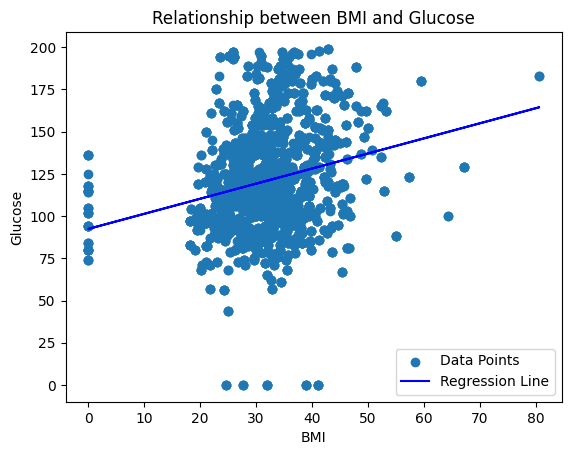

In [46]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define predictor and target variables
X = df4['BMI']
y = df4['Glucose']

# Add a constant term (intercept) to the predictor variable
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Create a scatter plot and overlay the regression line
plt.scatter(df4['BMI'], df4['Glucose'], label='Data Points')
plt.plot(df4['BMI'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Relationship between BMI and Glucose')
plt.legend()
plt.show()


## **Analysis**
## Although the model was statistically significant, with an F-statistic of 147.9 and a p-value of 3.42e-33, its explanatory power was limited, as indicated by an R-squared value of 0.051. This suggests that only 5.1% of the variance in 'Glucose' can be explained by 'BMI' alone.

## The coefficients in the model were statistically significant, with the 'BMI' coefficient at 0.8938, indicating that a one-unit increase in BMI is associated with an increase of 0.8938 units in 'Glucose.' However, the low R-squared value suggests that other unaccounted factors play a more substantial role in determining 'Glucose' levels. Further investigation or the inclusion of additional relevant features may improve the model's predictive accuracy.